##**Una cadena de Supermercados Online que opera en Brasil quiere obtener insights sobre la venta de sus productos. Para hacer esto, usted, como científico de datos, deberá analizar los pedidos de sus clientes y mostrar gráficamente las respuestas de las siguientes preguntas de negocio:**

### **Preguntas**

1. **¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?**

2. **¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?**

3. **Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?**

4. **¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?**

5. **¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?**

6. **¿Cuáles son los productos con menor venta en la región Sureste?**

#**1. Configuración del Ambiente**


---




In [104]:
#importación de librerias y definiendo variables globales
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
global df_ventas, df_ventas_limpio, df_ganancias_negativas, año_inicio, año_fin, df_modo_envio, df_ventas_sp, df_prod_sureste


#**2. Datos recibidos del cliente sin tratamiento de datos**

In [105]:
print('Base de datos recibida del cliente:')
print('Información:')
#importar dataset
df_ventas = pd.read_csv("https://raw.githubusercontent.com/kcvianam/Analisis-Ventas-Supermercado/main/reporte_ventas.csv?token=GHSAT0AAAAAACKVP6AATD6VFMIQTNPAOY6KZK63NBA", sep = ',')
print(df_ventas.info())
print('------------')
print('Duplicados:')
print(df_ventas.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancia<=0:')
print((df_ventas['total_ganancia'] <= 0).sum())

Base de datos recibida del cliente:
Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantida

#**3. Definición de la función y tratamiento de los datos**

In [106]:
def obtencion_datos():
  #importar dataset
  df_ventas = pd.read_csv("https://raw.githubusercontent.com/kcvianam/Analisis-Ventas-Supermercado/main/reporte_ventas.csv?token=GHSAT0AAAAAACKVP6AATD6VFMIQTNPAOY6KZK63NBA", sep = ',')

  #mostrar las primeras 5 filas
  df_ventas.head(5)

  #convertir los campos 'fecha_pedido' y 'fecha_envio' en formato fecha(YYYY-MM-DD)
  df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d', errors='coerce')
  df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d', errors='coerce')

  #mostramos los registros duplicados
  df_ventas[df_ventas.duplicated()]

  #Eliminamos los registros duplicados
  df_ventas_limpio = df_ventas.drop_duplicates().copy()

  #Eliminamos los registros del campo 'nombre_cliente == "prueba"
  df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != "prueba"]

  #Eliminamos los registros del campo 'nombre_cliente' que son nullos
  df_ventas_limpio.dropna(subset = ['nombre_cliente'], inplace = True)

  #Pasamos los datos de 'total_ganancia' que son negativos (pérdidas) a un DataFrame df_ganancias_negativas
  df_ganancias_negativas=df_ventas_limpio[df_ventas_limpio['total_ganancia'] <= 0]

  #Eliminamos los registros del campo 'total_ganancia' que son negativos (pérdidas) e iguales a 0
  df_ventas_limpio=df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]

  #Reseteo del index del DataFrame
  df_ventas_limpio.index = (range(df_ventas_limpio.shape[0]))

#**4. Ejecutar limpieza de datos**


---




In [107]:
def ejecutar_limpieza():
  #Ejecutando limpieza
  print("\n")
  print("Base de datos - Con limpieza de datos")
  obtencion_datos()
  print('Información:')
  print(df_ventas_limpio.info())
  print('------------')
  print('Duplicados:')
  print(df_ventas_limpio.duplicated().sum())
  print('------------')
  print('Registros de prueba:')
  print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
  print('------------')
  print('Registros con ganancia<=0:')
  print((df_ventas_limpio['total_ganancia'] <= 0).sum())

#**5. Preguntas y respuestas**


##**Pregunta 1: ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?**

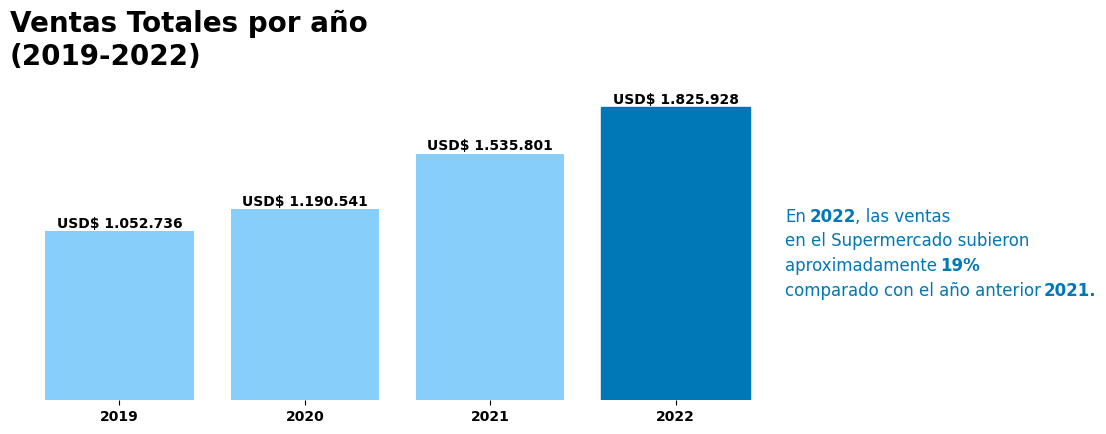

In [108]:
def pregunta_1():
  #creando el nuevo DataFrame df_ventas_año y creando una copia del df_ventas
  df_ventas_año=df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()

  #creando la nueva columna año en el DataFrame df_ventas_año
  df_ventas_año['año']=df_ventas_año['fecha_pedido'].dt.year

  #eliminando la columna fecha_pedido del DataFrame df_ventas_año
  df_ventas_año.drop(['fecha_pedido'], axis=1, inplace=True)

  #agrupar por año
  group_año=df_ventas_año.groupby('año')

  #sumarizar los valores de 'total_venta'
  group_año=group_año['total_venta'].aggregate(['sum']).rename(columns ={'sum':'total_venta'})

  #resetear los indices
  group_año.reset_index(inplace=True)

  #capturar el año de inicio y fin del dataset
  año_inicio=(group_año['año'].min())
  año_fin=(group_año['año'].max())

  #definiendo los colores del grafico
  colores=('#0077B6','#87CEFA')

  #visualizacion
  #crear la figura
  fig, ax = plt.subplots(figsize=(10,4))

  #grafico de barras para cada año
  bars=ax.bar(group_año['año'], group_año['total_venta'], color=colores[1], width=0.8)

  #encontrar la mayor venta
  max_venta = group_año['total_venta'].idxmax()

  #encontrar la venta anterior
  venta_anterior = max_venta-1

  #colocar los valores sobre cada barra del grafico
  pad=20000
  for i, bar in enumerate(bars):
    valor = bar.get_height()
    qtd = f'USD$ {valor:,.0f}'.replace(',', '.')
    ax.text(bar.get_x()+bar.get_width()/2.0,valor+pad,qtd, ha='center', weight='bold', wrap='True')

    #cambiar el color a la barra de mayor venta
    if i==max_venta:
      bar.set_color(colores[0])
      valor_max_venta=group_año['total_venta'].loc[max_venta]
      año_max_venta=group_año['año'].loc[max_venta]
      año_anterior=group_año['año'].loc[max_venta-1]
      valor_venta_anterior=group_año['total_venta'].loc[venta_anterior]
      porcentaje=((valor_max_venta-valor_venta_anterior)/valor_venta_anterior)*100


  #formatear el año a que se visualice en numero entero
  plt.xticks(group_año['año'].astype(int),weight='bold')

  #ocultar los datos del eje Y
  ax.set_yticklabels([])
  ax.tick_params(axis='y', which='both', left=False)

  #ajustar titulo
  ax.set_title(f'Ventas Totales por año\n({año_inicio}-{año_fin})', loc='left', weight='bold', fontsize=20, pad=20)

  #colocar leyenda con el porcentaje de crecimiento de ventas
  ax.text(1, 0.58, f'En',transform=ax.transAxes, fontsize=12, color=colores[0])
  ax.text(1.032, 0.58, f'{año_max_venta}',transform=ax.transAxes, fontsize=12, weight='bold', color=colores[0])
  ax.text(1.090, 0.58, f', las ventas',transform=ax.transAxes, fontsize=12, color=colores[0])
  ax.text(1, 0.50, f'en el Supermercado subieron',transform=ax.transAxes, fontsize=12, color=colores[0])
  ax.text(1, 0.42,f'aproximadamente',transform=ax.transAxes, fontsize=12,  color=colores[0])
  ax.text(1.2, 0.42, f'{porcentaje:.0f}%',transform=ax.transAxes, fontsize=12, weight='bold', color=colores[0])
  ax.text(1, 0.34, f'comparado con el año anterior',transform=ax.transAxes, fontsize=12, color=colores[0])
  ax.text(1.334, 0.34, f'{año_anterior}.',transform=ax.transAxes, fontsize=12, weight='bold',color=colores[0])

  #quitando la linea del borde del gráfico
  ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

  #mostrar grafico
  plt.show()
pregunta_1()

##**Pregunta 2: ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?**

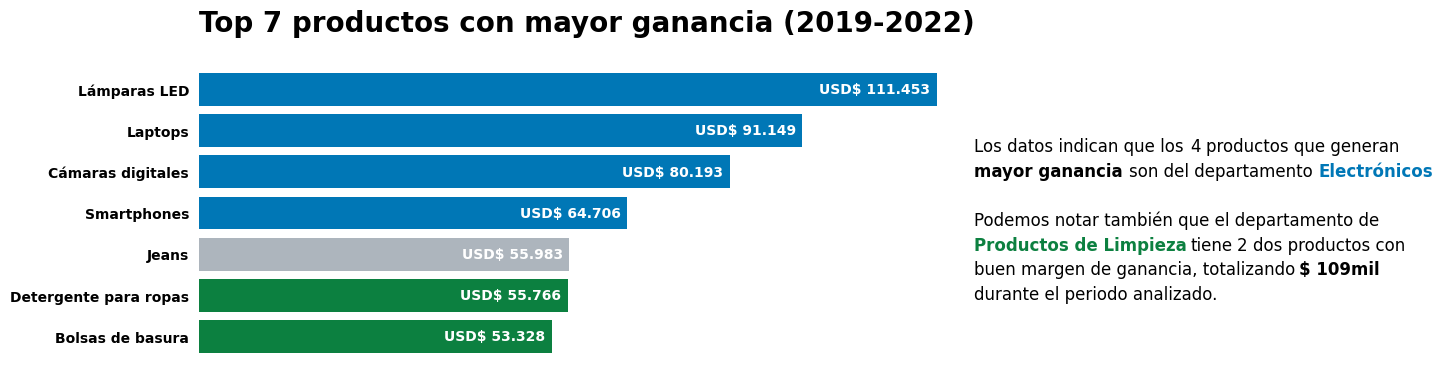

In [109]:
def pregunta_2():
  #generando una copia del df_ventas_limpio al df_top_ganancias
  df_top_ganancias=df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()

  #agrupar y sumarizar por total ganancia
  df_top_ganancias = df_top_ganancias.groupby(['tipo_producto']).aggregate({'total_ganancia':'sum'}).sort_values('total_ganancia', ascending=False)

  #colocar en el Data_Frame los primeros 7 registros
  df_top_ganancias=df_top_ganancias.head(7)
  df_top_ganancias=df_top_ganancias.sort_values(by='total_ganancia', ascending=True)

  #creando un dataframe con el departamento del producto y el tipo de producto
  df_producto = pd.merge(df_top_ganancias, df_ventas_limpio[['tipo_producto', 'departamento_producto']], on='tipo_producto')
  df_producto = df_producto.drop_duplicates(subset=['tipo_producto'])

  #saber cuales son los departamentos con mayor ganancia y cantidad
  df_dep_ganancia = df_producto.groupby('departamento_producto')['total_ganancia'].agg(['sum', 'count']).reset_index()

  #cambiar nombre a las columnas
  df_dep_ganancia = df_dep_ganancia.rename(columns={'sum': 'total_ganancia', 'count': 'cantidad_productos'})

  #ordenar descendentemente por total_ganancia
  df_dep_ganancia = df_dep_ganancia.sort_values(by='total_ganancia', ascending=False)

  #dibujando la figura
  fig, ax = plt.subplots(figsize=(10,4))

  #lista de colores
  colores=('#0C8040','#0C8040','#adb5bd', '#0077b6','#0077b6','#0077b6','#0077b6')

  #creando el grafico de barras horizontales
  ax.barh(df_top_ganancias.index, width=df_top_ganancias['total_ganancia'], color=colores, align='center')

  #colocar etiquetas a las barras
  pad=1000
  for i,valor in enumerate(df_top_ganancias['total_ganancia']):
    qtd = f'USD$ {valor:,.0f}'.replace(',', '.')
    ax.text(valor-pad,i,qtd, ha='right', weight='bold', va='center', color='white')

  #quitando la linea del borde del gráfico
  ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

  #ocultar datos del eje X
  ax.set_xticklabels([])
  ax.tick_params(axis='x', which='both', bottom=False)

  #ocultar lineas del eje Y
  ax.tick_params(axis='y', which='both', left=False)

  #titulo del  grafico
  ax.set_title(f'Top 7 productos con mayor ganancia ({año_inicio}-{año_fin})', loc='left', weight='bold', fontsize=20, pad=20)

  #configurando las posiciones de los ticks
  ax.set_yticks(range(len(df_top_ganancias.index)))
  #negrita en el eje Y
  ax.set_yticklabels(df_top_ganancias.index, fontweight='bold')


  #colocando la leyenda con la información sobre productos y departamentos
  ax.text(1, 0.7, f'Los datos indican que los',transform=ax.transAxes, fontsize=12, color='black')
  ax.text(1.28, 0.7, f'{df_dep_ganancia.iloc[0, 2]}', transform=ax.transAxes, fontsize=12, color='black')
  ax.text(1.30, 0.7, f'productos que generan',transform=ax.transAxes, fontsize=12, color='black')
  ax.text(1, 0.62, f'mayor ganancia',transform=ax.transAxes, fontsize=12, color='black', weight='bold')
  ax.text(1.20, 0.62, f'son del departamento', transform=ax.transAxes, fontsize=12, color='black')
  ax.text(1.445, 0.62, f'{df_dep_ganancia.iloc[0, 0]}', transform=ax.transAxes, fontsize=12, color=colores[3],  weight='bold')
  ax.text(1, 0.46, f'Podemos notar también que el departamento de   ',transform=ax.transAxes, fontsize=12, color='black')
  ax.text(1, 0.38, f'{df_dep_ganancia.iloc[1, 0]}',transform=ax.transAxes, fontsize=12, color=colores[0], weight='bold')
  ax.text(1.28, 0.38, f'tiene',transform=ax.transAxes, fontsize=12, color='black')
  ax.text(1.34, 0.38, f'{df_dep_ganancia.iloc[1, 2]}', transform=ax.transAxes, fontsize=12, color='black')
  ax.text(1.36, 0.38, f'dos productos con',transform=ax.transAxes, fontsize=12, color='black')
  ax.text(1, 0.3, f'buen margen de ganancia, totalizando',transform=ax.transAxes, fontsize=12, color='black')
  ax.text(1.42, 0.3, f"$ {df_dep_ganancia.iloc[1, 1]/1000:.0f}mil", transform=ax.transAxes, fontsize=12, color='black', weight='bold')
  ax.text(1, 0.22, f'durante el periodo analizado.   ',transform=ax.transAxes, fontsize=12, color='black')

  #mostrar grafico
  plt.show()
pregunta_2()

##**Pregunta 3: Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?**

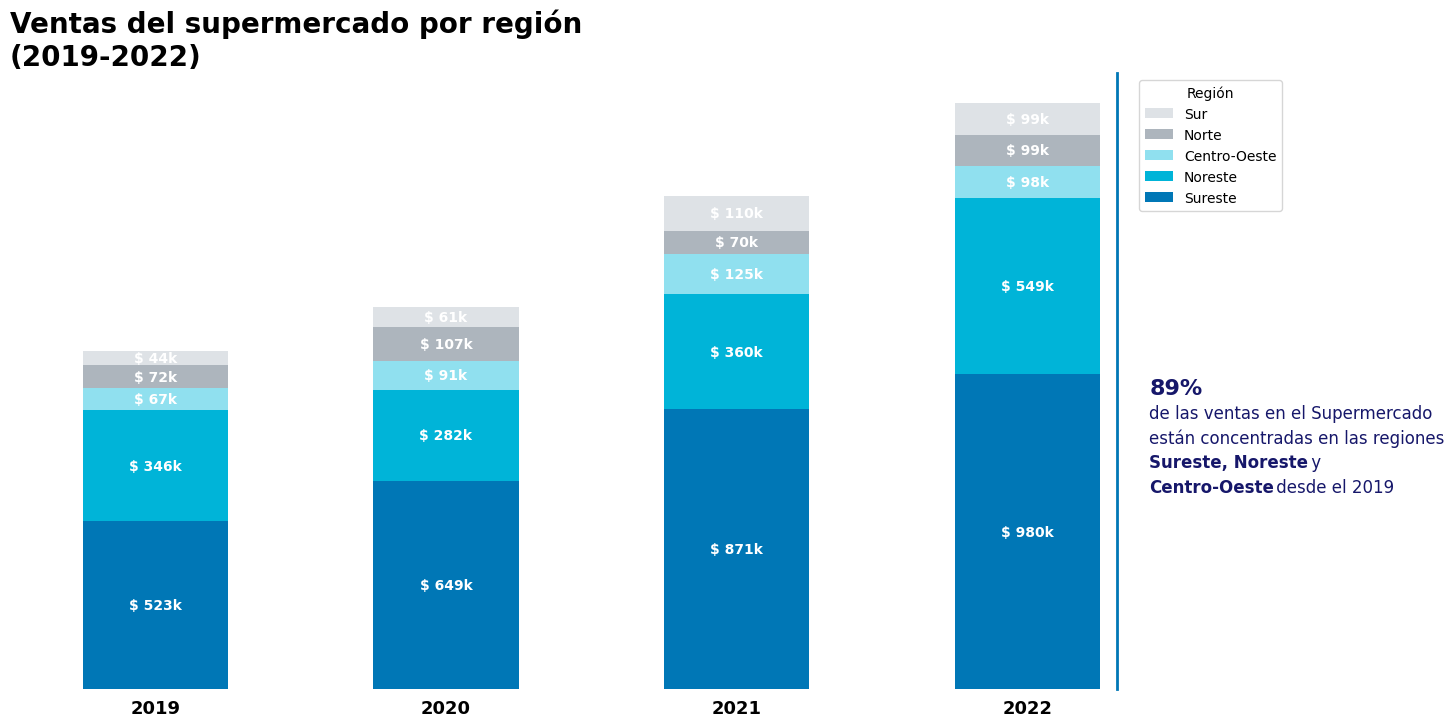

In [110]:
def pregunta_3():
  #creando un nuevo dataframe df_ventas_año_region con los datos de df_ventas_limpio
  df_ventas_año_region=df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()

  #creando una nueva columna llamada año
  df_ventas_año_region['año']=df_ventas_año_region.fecha_pedido.dt.year

  #eliminando columna fecha_pedido de df_ventas_año_region
  df_ventas_año_region.drop(['fecha_pedido'], axis=1, inplace=True)

  #crear una tabla cruzada
  df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values=df_ventas_año_region['total_venta'], aggfunc="sum")[['Sureste', 'Noreste','Centro-Oeste', 'Norte', 'Sur']]

  #regiones con mas ventas desde 2019
  for año in df_ventas_año_region.index:
    porcentaje_ventas_año = df_ventas_año_region.loc[año] / df_ventas_año_region.loc[año].sum() * 100
  porcentaje_ventas_año=porcentaje_ventas_año.head(3)
  suma_porcentaje= porcentaje_ventas_año.sum()

  #colocando lista de colores
  colores=('#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6','#16176a')

  #visualizacion
  #creando la figura
  ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15,8), color=colores)

  #colocando los valores en las barras
  for container in ax.containers:
    labels = [f'$ {valor/1000:,.0f}k' for valor in container.datavalues]
    ax.bar_label(container, label_type='center', fontsize=10, color='white', weight='bold', labels=labels)

  #acomodar leyenda
  plt.legend(title='Región', loc='upper right', reverse=True, bbox_to_anchor=(1.10, 1))

  #titulo del  grafico
  ax.set_title(f'Ventas del supermercado por región\n({año_inicio}-{año_fin})', loc='left', weight='bold', fontsize=20)

  #quitando la linea del borde del gráfico
  ax.spines[['top', 'left', 'bottom']].set_visible(False)

  #Colocando la linea del costado derecho
  ax.spines['right'].set_position(('outward', -40))
  ax.spines['right'].set_edgecolor(colores[0])
  ax.spines['right'].set_linewidth(2)

  #ocultar datos del eje X
  ax.tick_params(axis='x', which='both', bottom=False)
  ax.set_xlabel('')
  ax.set_xticklabels(df_ventas_año_region.index,rotation=0, fontweight='bold', fontsize=13)

  #ocultar lineas del eje Y
  ax.tick_params(axis='y', which='both', left=False)
  ax.set_yticklabels([])

 #colocar leyenda con el resumen de la información de las regiones
  ax.text(0.98, 0.48, f'{suma_porcentaje:.0f}%',transform=ax.transAxes, fontsize=16, color=colores[5], weight='bold')
  ax.text(0.98, 0.44, f'de las ventas en el Supermercado',transform=ax.transAxes, fontsize=12, color=colores[5])
  ax.text(0.98, 0.40, f'están concentradas en las regiones',transform=ax.transAxes, fontsize=12, color=colores[5])
  ax.text(0.98, 0.36, f'{porcentaje_ventas_año.index[0]}, {porcentaje_ventas_año.index[1]}',transform=ax.transAxes, fontsize=12, color=colores[5], weight='bold')
  ax.text(1.115, 0.36, f' y',transform=ax.transAxes, fontsize=12, color=colores[5])
  ax.text(0.98, 0.32, f'{porcentaje_ventas_año.index[2]}',transform=ax.transAxes, fontsize=12, color=colores[5], weight='bold')
  ax.text(1.085, 0.32, f' desde el 2019',transform=ax.transAxes, fontsize=12, color=colores[5])

  #dibujando el grafico
  plt.show()

pregunta_3()

##**Pregunta 4: ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?**

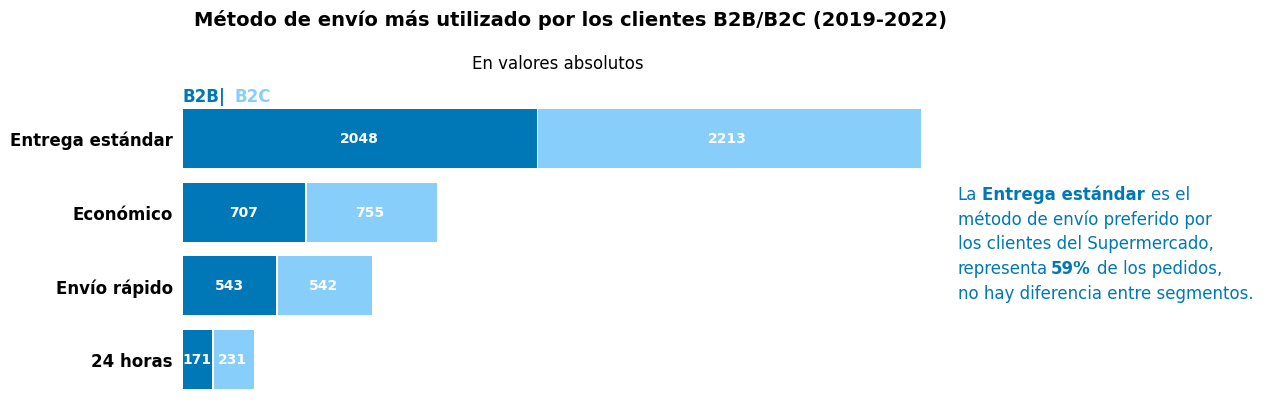

In [111]:
def pregunta_4():
  #creando el nuevo DataFrame df_modo_envio y creando una copia del df_ventas_limpio
  df_modo_envio=df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()

  #calcular el metodo de envio preferido y la cantidad de veces que aparece en el DataFrame
  metodo_envio_max=df_modo_envio['modo_envio'].mode().values[0]
  cantidad = (df_modo_envio['modo_envio'] == metodo_envio_max).sum()

  #calcular el porcentaje del metodo de envio preferido sobre los demás metodos
  total_pedidos=len(df_modo_envio)
  porcentaje_envio=(cantidad/total_pedidos) * 100

  #creando una lista con los modos de envio
  labels=df_modo_envio['modo_envio'].drop_duplicates().to_list()

  #creando una tabla cruzada con los valores de modo_envio, segmento_cliente y asignando al DataFrame df_modo_envio
  df_modo_envio=pd.crosstab(index = df_modo_envio['modo_envio'], columns = df_modo_envio['segmento_cliente']).sort_values("B2B")

  #visualizacion
  #crear la figura
  fig, ax = plt.subplots(figsize=(10,4))

  #definiendo los colores de las barras
  colores=('#0077B6','#87CEFA')

  #creando el grafico de barras horizontal
  pad=10
  ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[0], label='B2B')
  ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'] + pad, color=colores[1], label='B2C')


  #colocando las etiquetas a las barras
  for modo in df_modo_envio.index:
    cant_b2b = df_modo_envio.loc[modo, 'B2B']
    cant_b2c = df_modo_envio.loc[modo, 'B2C']

    #ajustar la posicion de las etiquetas
    ax.text(cant_b2b / 2, df_modo_envio.index.get_loc(modo), str(cant_b2b), ha='center', va='center', fontsize=10, color='white', weight='bold')
    ax.text(cant_b2b + cant_b2c / 2, df_modo_envio.index.get_loc(modo), str(cant_b2c), ha='center', va='center', fontsize=10, color='white', weight='bold')


  #ocultar los datos del eje X
  ax.set_xticks([])
  ax.set_xticklabels([])

  #formato al eje Y
  ax.set_yticks(np.arange(len(df_modo_envio.index)))
  ax.set_yticklabels(df_modo_envio.index, fontsize=12, color='black', weight='bold')

  #titulo del grafico
  ax.set_title(f'Método de envío más utilizado por los clientes B2B/B2C ({año_inicio}-{año_fin})', fontsize=14, fontweight='bold', pad=50, ha='center')

  #subtitulo del grafico
  fig.suptitle('En valores absolutos', fontsize=12, ha='center')

  #leyenda con el valor de segmentos de clientes
  ax.text(0, 3.5, 'B2B|', fontsize=12, fontweight='bold', color=colores[0])
  ax.text(300, 3.5, 'B2C', fontsize=12, fontweight='bold', color=colores[1])

  #colocando la leyenda con la información sobre el metodo de envio mas usado
  ax.text(1, 0.66, f'La',transform=ax.transAxes, fontsize=12, color=colores[0])
  ax.text(1.032, 0.66, f'{metodo_envio_max}',transform=ax.transAxes, fontsize=12, weight='bold', color=colores[0])
  ax.text(1.25, 0.66, f'es el',transform=ax.transAxes, fontsize=12, color=colores[0])
  ax.text(1, 0.58, f'método de envío preferido por',transform=ax.transAxes, fontsize=12, color=colores[0])
  ax.text(1, 0.50,f'los clientes del Supermercado,',transform=ax.transAxes, fontsize=12,  color=colores[0])
  ax.text(1, 0.42, f'representa',transform=ax.transAxes, fontsize=12, color=colores[0])
  ax.text(1.12, 0.42, f'{porcentaje_envio:.0f}%',transform=ax.transAxes, fontsize=12, weight='bold', color=colores[0])
  ax.text(1.18, 0.42, f'de los pedidos,',transform=ax.transAxes, fontsize=12, color=colores[0])
  ax.text(1, 0.34, f'no hay diferencia entre segmentos.   ',transform=ax.transAxes, fontsize=12, color=colores[0])

  #quitando la linea del borde del gráfico
  ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

  #quitando los valores del eje Y
  ax.tick_params(axis='y', which='both', left=False)

  #mostrando el grafico
  plt.show()

pregunta_4()

##**Pregunta 5: ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?**

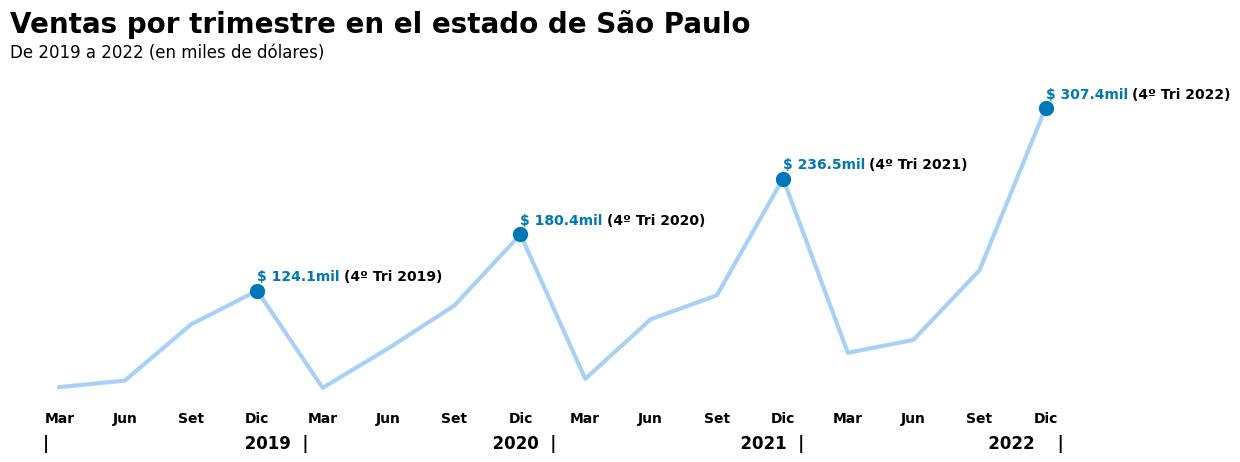

In [112]:
def pregunta_5():
  #haciendo una copia del DataFrame df_ventas_limpio a df_ventas_sp con los registros del estado de São Paulo colocando la columna fecha_pedido como indice.
  df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].set_index('fecha_pedido')[['total_venta']].copy()

  #agrupar las ventas por trimestre
  df_ventas_sp=df_ventas_sp.resample('Q').agg('sum')

  #redondear el valor de la columna total_venta para dejarlo en escala de miles
  df_ventas_sp['total_venta'] = (df_ventas_sp['total_venta'] / 1000).round(2)

  #resetear los indices
  df_ventas_sp.reset_index(inplace=True)

  #lista boolena para marcar los puntos en la grafica
  puntos_a_marcar = []
  for i in range(len(df_ventas_sp)):
    puntos_a_marcar.append((i + 1) % 4 == 0)

  #definiendo los colores del grafico
  colores=('#0077B6','#87CEFA','#A9D0F5')

  #visualizacion
  #crear la figura
  fig, ax = plt.subplots(figsize=(14,4))

  #creando el grafico de líneas
  ax.plot(df_ventas_sp.fecha_pedido,df_ventas_sp.total_venta,marker="o",markevery=puntos_a_marcar, color=colores[2], linewidth=3,
          markerfacecolor=colores[0], markeredgecolor=colores[0], markersize=10)

  #colocando el eje x
  x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
  ax.set_xticks(df_ventas_sp.fecha_pedido)
  ax.set_xticklabels(x_labels, ha="center", weight='bold')

  #ocultar las lineas separadoras de los meses
  ax.tick_params(axis='x', which='both', bottom=False)

  #colocando el eje x secundario
  #lista con los años
  años = df_ventas_sp['fecha_pedido'].dt.year.unique().tolist()

  #dar formato al año y unirlos con " | "
  años_formateados = ["{:>35} ".format(str(año)) for año in años]
  x_años = "|   " + " | ".join(años_formateados)+ "   |"
  ax.text(0.03, -0.15, x_años, transform=ax.transAxes, fontsize=12, weight='bold')

  #colocar los valores en los puntos marcados
  pad=10
  pad2=120
  for i in range(3, len(df_ventas_sp["total_venta"]), 4):
    valor=(df_ventas_sp["total_venta"][i])
    valor=f'$ {valor:,.1f}mil'
    texto=f'(4º Tri {df_ventas_sp["fecha_pedido"].iloc[i].year})'

    #colocando los labels a los puntos marcados, variable valor
    ax.text(ax.get_xticks()[i], df_ventas_sp["total_venta"].iloc[i] + pad, valor, color=colores[0], weight='bold')

    #colocando los labels a los puntos marcados, variable texto
    ax.text(ax.get_xticks()[i]+pad2, df_ventas_sp["total_venta"].iloc[i] + pad, texto, color='black', weight='bold')

  #ajustar titulo
  ax.text(0, 1.2, 'Ventas por trimestre en el estado de São Paulo',transform=ax.transAxes,fontsize=20, weight='bold')
  ax.text(0, 1.12, f'De {año_inicio} a {año_fin} (en miles de dólares)',transform=ax.transAxes,fontsize=12)

  #quitando la linea del borde del gráfico
  ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

  #quitando los valores del eje Y
  ax.set_yticklabels([])
  ax.tick_params(axis='y', which='both', left=False)

  plt.show()

pregunta_5()


##**Pregunta 6: ¿Cuáles son los productos con menor venta en la región Sureste?**

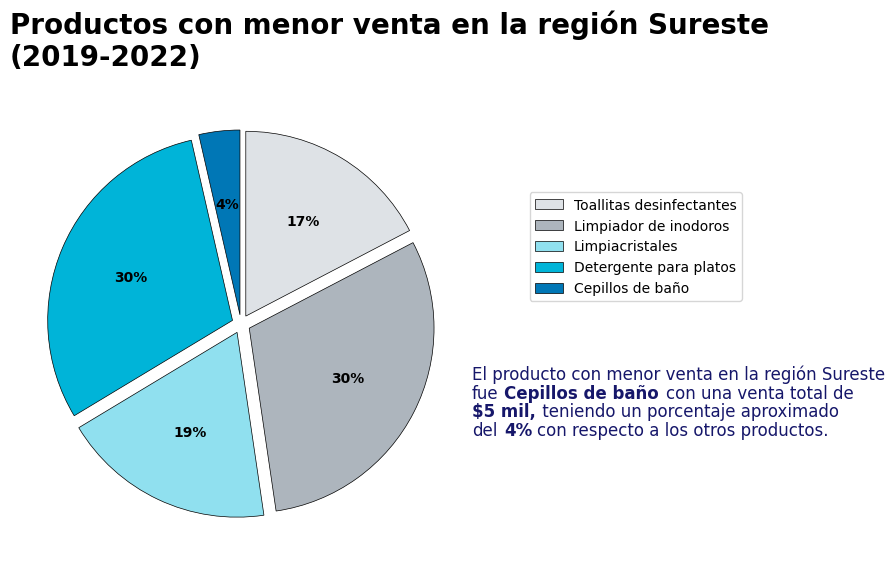

In [113]:
def pregunta_6():
  #creando un nuevo dataframe con los campos tipos_producto, total_venta, region, total_ganancia de la región Sureste
  df_prod_sureste = df_ventas_limpio[df_ventas_limpio['region'] == 'Sureste'][['tipo_producto', 'total_venta', 'total_ganancia']].copy()

  #filtrando los 5 articulos menos vendidos
  art_menor_venta = df_prod_sureste.groupby('tipo_producto')['total_venta'].sum().nsmallest(5).index

  #colocar en un dataframe estos articulos menos vendidos
  df_menos_vendidos = df_prod_sureste[df_prod_sureste['tipo_producto'].isin(art_menor_venta)]

  #agrupar por tipo de producto y hacer sumatoria a las ventas
  df_menos_vendidos = df_menos_vendidos.groupby('tipo_producto')['total_venta'].sum().reset_index()

  #sacar el producto menos vendido
  prod_menor = df_menos_vendidos[df_menos_vendidos['total_venta'] == df_menos_vendidos['total_venta'].min()]

  #calcular el porcentaje de venta con respecto a los otros productos
  total_ventas = df_menos_vendidos['total_venta'].sum()
  por_prod_menor = (prod_menor['total_venta'].values[0] / total_ventas) * 100
  prod_menor = prod_menor.copy()
  prod_menor['por_venta_total'] = por_prod_menor

  #colocando lista de colores
  colores=('#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6','#16176a')

  #creando la figura
  fig, ax = plt.subplots(figsize=(14,4))
  fig.set_figheight(6)

  #dando formato
  textprops = {"fontsize":10,'fontweight':'bold'}
  wedgeprops={'edgecolor':'black', 'linewidth':0.5}
  explode = [0.05] * len(df_menos_vendidos['tipo_producto'])

  #creando el grafico de pie
  plt.pie(df_menos_vendidos['total_venta'], autopct='%1.0f%%', startangle=90, colors=colores, explode=explode, textprops=textprops, wedgeprops=wedgeprops)

  #titulo del grafico
  plt.title(f'Productos con menor venta en la región Sureste\n({año_inicio}-{año_fin})', loc='left', weight='bold', fontsize=20, pad=20)

  #colocar legenda
  plt.legend(labels=df_menos_vendidos['tipo_producto'], loc='upper right', bbox_to_anchor=(1.6, 0.8), reverse=True)

  #colocando la leyenda con la información sobre el metodo de envio mas usado
  ax.text(1, 0.38, f'El producto con menor venta en la región Sureste',transform=ax.transAxes, fontsize=12, color=colores[5])
  ax.text(1, 0.34, f'fue',transform=ax.transAxes, fontsize=12, color=colores[5])
  ax.text(1.07, 0.34, f"{prod_menor['tipo_producto'].iloc[0]}",transform=ax.transAxes, fontsize=12, weight='bold', color=colores[5])
  ax.text(1.42, 0.34, f'con una venta total de ',transform=ax.transAxes, fontsize=12, color=colores[5])
  ax.text(1, 0.30, f"${prod_menor['total_venta'].iloc[0]/1000:.0f} mil, ",transform=ax.transAxes, fontsize=12, weight='bold', color=colores[5])
  ax.text(1.14, 0.30, f' teniendo un porcentaje aproximado',transform=ax.transAxes, fontsize=12, color=colores[5])
  ax.text(1, 0.26, f'del',transform=ax.transAxes, fontsize=12, color=colores[5])
  ax.text(1.07, 0.26, f"{prod_menor['por_venta_total'].iloc[0]:.0f}%",transform=ax.transAxes, fontsize=12, weight='bold', color=colores[5])
  ax.text(1.14, 0.26, f'con respecto a los otros productos.',transform=ax.transAxes, fontsize=12, color=colores[5])

  #mostrando el grafico
  plt.show()

pregunta_6()